<a href="https://colab.research.google.com/github/Grandes/DeepLearningwithPython_keras/blob/master/Practice_3chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'


#IMDB 데이터셋
인터넷 영화 데이터베이스로부터 가져온 양극단의 리뷰 50,000개로 이루어진 IMDB 데이터셋을 사용하겠습니다. 이 데이터셋은 훈련 데이터 25,000개와 테스트 데이터 25,000개로 나뉘어 있고 각각 50%는 부정, 50%는 긍정 리뷰로 구성되어 있습니다.

In [2]:
#3-1 IMDB 데이터셋 로드하기
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 0s 0us/step


- num_words = 10000 -> 훈련데이터에서 가장 자주 나타나는 단어 1만 개만 사용하겠다는 의미

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [0]:
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다.
word_index = imdb.get_word_index()
# 정수 인덱스와 단어를 매핑하도록 뒤집습니다.
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 리뷰를 디코딩합니다.
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다.
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])

In [13]:
decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [0]:
#3-2 정수 시퀀스를 이진 행렬로 인코딩하기
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
  return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
#3-3 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#3-4 모델 컴파일하기
model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [0]:
#3-5 옵티마이저 설정하기
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [0]:
#3-6 손실과 측정을 함수 객체로 지정히기
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

In [0]:
model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [0]:
#3-7 검증 세트 준비하기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [23]:
#3-8 모델 훈련하기
model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.5086 - acc: 0.7813 - val_loss: 0.3796 - val_acc: 0.8694
Epoch 2/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.3006 - acc: 0.9055 - val_loss: 0.3005 - val_acc: 0.8899
Epoch 3/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.2180 - acc: 0.9282 - val_loss: 0.3087 - val_acc: 0.8710
Epoch 4/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.1750 - acc: 0.9434 - val_loss: 0.2840 - val_acc: 0.8838
Epoch 5/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1426 - acc: 0.9542 - val_loss: 0.2847 - val_acc: 0.8868
Epoch 6/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.1149 - acc: 0.9653 - val_loss: 0.3158 - val_acc: 0.8775
Epoch 7/20
15000/15000 [==============================] - 2s 137us/step - 

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

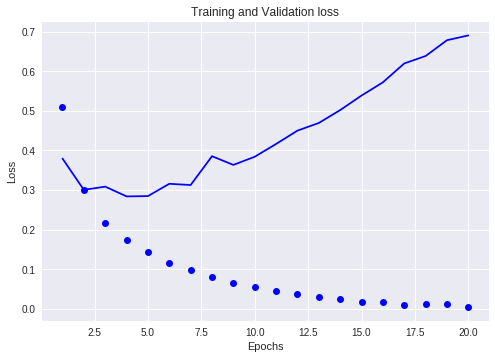

In [26]:
#3-9 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Trainning loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend

plt.show()

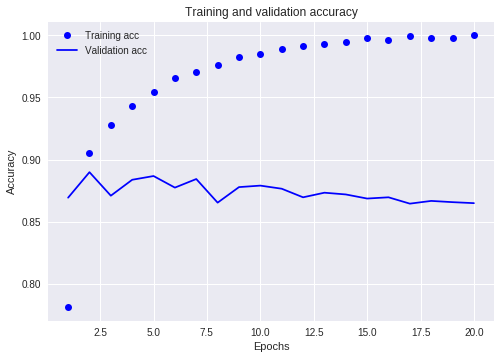

In [28]:
#3-10 훈련과 검증 정확도 그리기
plt.clf()   #  그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [29]:
#3-11 모델을 처으부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 110us/step - loss: 0.4743 - acc: 0.8216
Epoch 2/4
25000/25000 [==============================] - 2s 100us/step - loss: 0.2677 - acc: 0.9094
Epoch 3/4
25000/25000 [==============================] - 2s 96us/step - loss: 0.2032 - acc: 0.9284
Epoch 4/4
25000/25000 [==============================] - 2s 72us/step


In [30]:
results

[0.3103916131496429, 0.87648]

In [31]:
model.predict(x_test)

array([[0.16139841],
       [0.99985474],
       [0.40916446],
       ...,
       [0.08264065],
       [0.05104297],
       [0.46109003]], dtype=float32)

In [43]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 4,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

history_dict = history.history
history_dict.keys()

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 183us/step - loss: 0.5145 - acc: 0.7828 - val_loss: 0.3804 - val_acc: 0.8738
Epoch 2/4
15000/15000 [==============================] - 2s 140us/step - loss: 0.2996 - acc: 0.9052 - val_loss: 0.2994 - val_acc: 0.8889
Epoch 3/4
15000/15000 [==============================] - 2s 136us/step - loss: 0.2226 - acc: 0.9271 - val_loss: 0.2879 - val_acc: 0.8860
Epoch 4/4
15000/15000 [==============================] - 2s 138us/step - loss: 0.1723 - acc: 0.9467 - val_loss: 0.2750 - val_acc: 0.8904


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

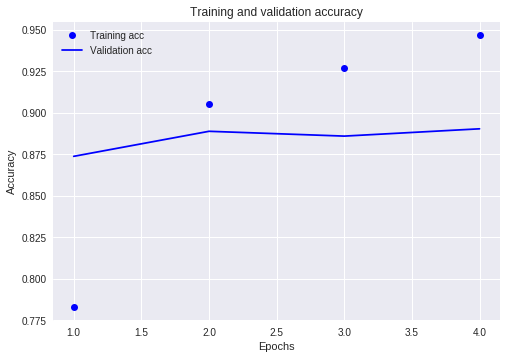

In [44]:
plt.clf()   #  그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()